# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **X** - Temperatura Média (°C) - do dia e não da cerveja
- **Y** - Consumo de Cerveja (litros)


---

### Utilize a célula abaixo para carregar os pacotes e/ou fazer configurações para o projeto

In [102]:
library(ggplot2)
library(dplyr)

### Importe o dataset

#### <font color=red>Utilize o parâmetro **sep = ';'** da função **read.csv** para importar corretamente o conjunto de dados. O dataset do projeto utiliza como separador de colunas o caractere ';'.

In [103]:
dados_consumo<-read.csv("Consumo_cerveja.csv")
dados_projeto<-read.csv("dados_projeto.csv",sep = ';')

### Visualize o conteúdo do Data Frame

In [104]:
head(dados_consumo,5)

,Data,Temperatura.Media..C.,Temperatura.Minima..C.,Temperatura.Maxima..C.,Precipitacao..mm.,Final.de.Semana,Consumo.de.cerveja..litros.
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,2015-01-01,"27,3","23,9","32,5",0,0,25.461
2,2015-01-02,"27,02","24,5","33,5",0,0,28.972
3,2015-01-03,"24,82","22,4","29,9",0,1,30.814
4,2015-01-04,"23,98","21,5","28,6","1,2",1,29.799
5,2015-01-05,"23,82",21,"28,3",0,0,28.900


In [105]:
head(dados_projeto,5)

,Y,X
,<int>,<dbl>
1,25461,27.30
2,28972,27.02
3,30814,24.82
4,29799,23.98
5,28900,23.82


In [106]:
dados_consumo_final <- dados_consumo[, -c(1, 3,4,5,6)]
dados_consumo_final

Temperatura.Media..C.,Consumo.de.cerveja..litros.
<chr>,<dbl>
"27,3",25.461
"27,02",28.972
"24,82",30.814
"23,98",29.799
"23,82",28.900
"23,78",28.218
24,29.732
"24,9",28.397
"28,2",24.886


In [107]:
colnames(dados_consumo_final) <- c("X", "Y")
head(dados_consumo_final,5)

,X,Y
,<chr>,<dbl>
1,"27,3",25.461
2,"27,02",28.972
3,"24,82",30.814
4,"23,98",29.799
5,"23,82",28.900


In [108]:
# Substituir vírgula por ponto e converter para numeric
dados_consumo_final$X <- as.numeric(gsub(",", ".",dados_consumo_final$X))
head(dados_consumo_final,5)

,X,Y
,<dbl>,<dbl>
1,27.30,25.461
2,27.02,28.972
3,24.82,30.814
4,23.98,29.799
5,23.82,28.900


In [109]:
# Remove o separador de milhar e converte para numeric
dados_consumo_final$Y <- as.numeric(gsub("\\.", "", dados_consumo_final$Y))
head(dados_consumo_final,5)

,X,Y
,<dbl>,<dbl>
1,27.30,25461
2,27.02,28972
3,24.82,30814
4,23.98,29799
5,23.82,289


In [110]:
sum(is.na(dados_consumo_final$Y))

[1] 576

Tem mais de 576 valores NA no dataframe. Vamos tirar turdo

In [111]:
# Retorna apenas as linhas onde todos os valores não são NA
dados_consumo_final <- dados_consumo_final[complete.cases(dados_consumo_final), ]

In [112]:
sum(is.na(dados_consumo_final$Y)) # vamos ver se há algum "NA"

[1] 0

In [113]:
nrow(dados_consumo_final)

[1] 365

### Obtenha e avalie as estatísticas descritivas dos dados

In [114]:
# número de linhas
nrow(dados_consumo_final)

[1] 365

In [115]:
print(sprintf("O valor médio de temperatura em são paulo é: %.2f °C", mean(dados_consumo_final$X)))
print(sprintf("O consumo médio em São Paulo (em litros) por dia é: %.2f L/dia ", mean(dados_consumo_final$Y)))

[1] "O valor médio de temperatura em são paulo é: 21.23 °C"
[1] "O consumo médio em São Paulo (em litros) por dia é: 22934.04 L/dia "


In [116]:
summary(dados_consumo_final)

       X               Y        
 Min.   :12.90   Min.   :   24  
 1st Qu.:19.02   1st Qu.:21092  
 Median :21.38   Median :24304  
 Mean   :21.23   Mean   :22934  
 3rd Qu.:23.28   3rd Qu.:28034  
 Max.   :28.86   Max.   :37937  

### Análise gráfica
### Construa um box plot para cada variável do dataset

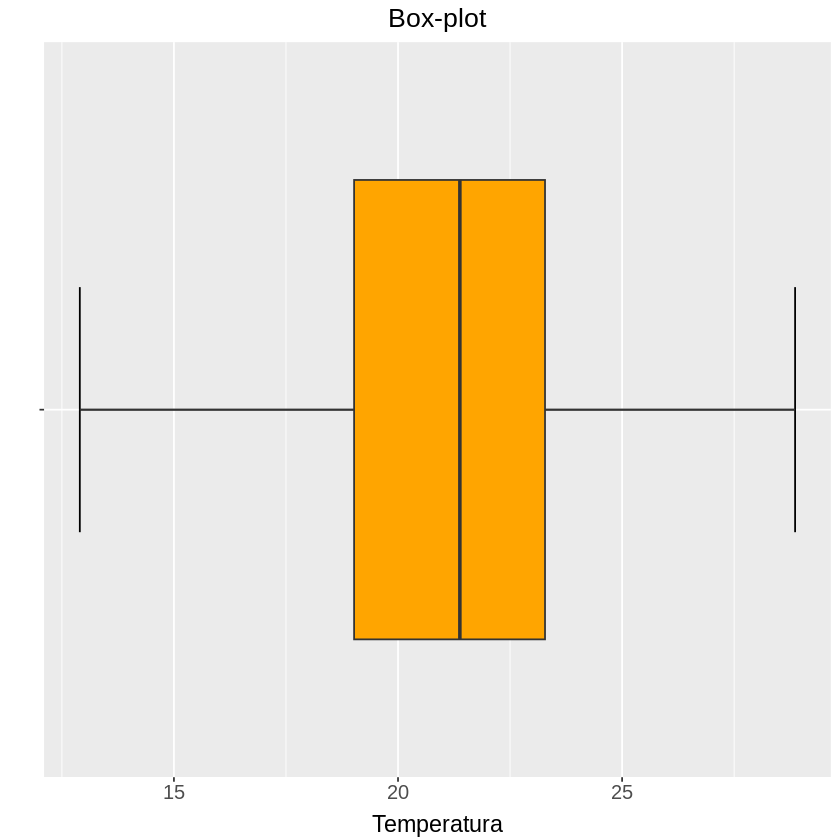

In [117]:
ggplot(dados_consumo_final, aes(x = "", y = X)) +
  stat_boxplot(geom ='errorbar', width = 0.4) +
  geom_boxplot(fill ="Orange") +
  coord_flip() +
  xlab("") +
  ylab("Temperatura") +
  ggtitle('Box-plot') +
  theme(
      plot.title = element_text(size = 16, hjust = 0.5),
      axis.title.y = element_text(size = 14, vjust = +0.2),
      axis.title.x = element_text(size = 14, vjust = -0.2),
      axis.text.y = element_text(size = 12),
      axis.text.x = element_text(size = 12)
  )


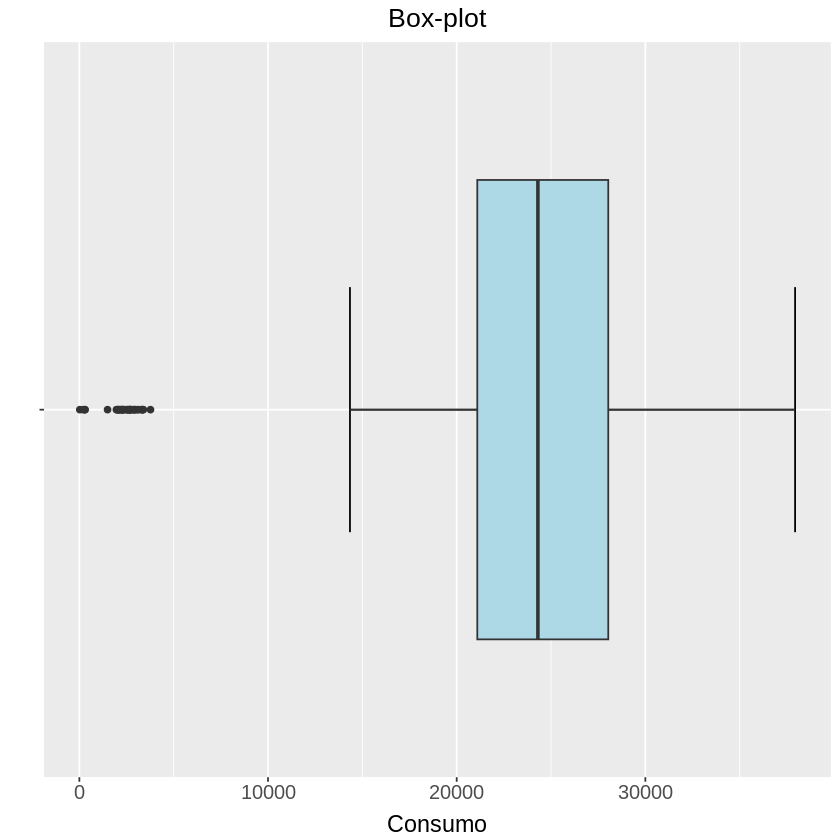

In [118]:
ggplot(dados_consumo_final, aes(x = "", y = Y)) +
  stat_boxplot(geom ='errorbar', width = 0.4) +
  geom_boxplot(fill ="lightBlue") +
  coord_flip() +
  xlab("") +
  ylab("Consumo") +
  ggtitle('Box-plot') +
  theme(
      plot.title = element_text(size = 16, hjust = 0.5),
      axis.title.y = element_text(size = 14, vjust = +0.2),
      axis.title.x = element_text(size = 14, vjust = -0.2),
      axis.text.y = element_text(size = 12),
      axis.text.x = element_text(size = 12)
  )


### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

`geom_smooth()` using formula = 'y ~ x'


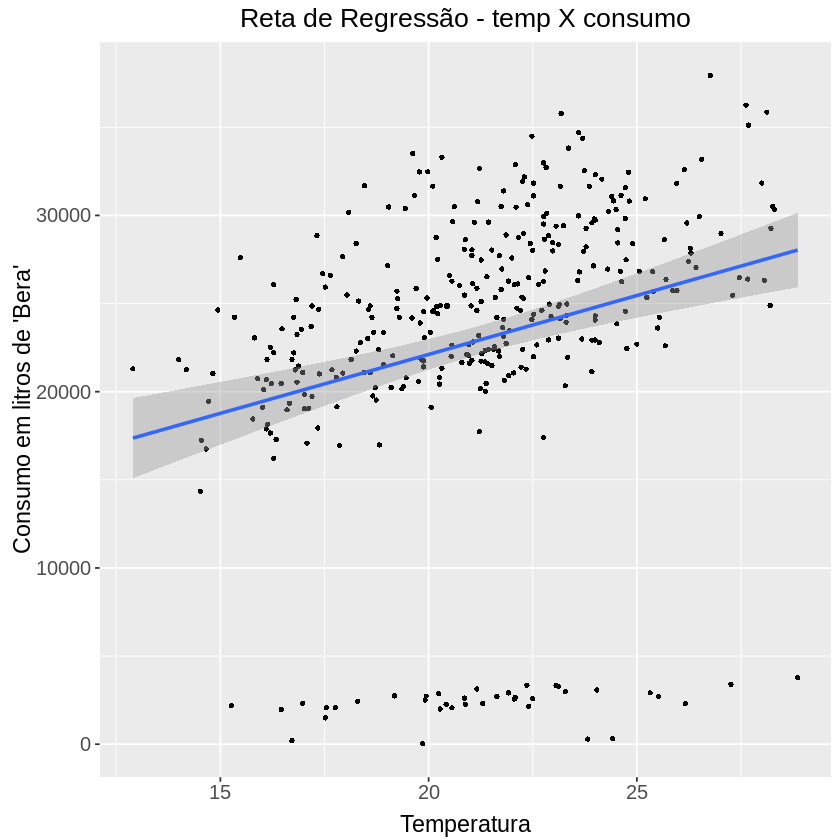

In [156]:
ggplot(data = dados_consumo_final, aes(x = X, y = Y)) +
    geom_point(size = 1.5, stroke = 0) +
    geom_smooth(method = lm) +
    xlab("Temperatura") +
    ylab("Consumo em litros de 'Bera'") +
    ggtitle('Reta de Regressão - temp X consumo') +
    theme(
        plot.title=element_text(size = 16, hjust = 0.5),
        axis.title.y=element_text(size = 14, vjust = +0.2),
        axis.title.x=element_text(size = 14, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

### <font color='red'>Utilizando a matriz de correlação</font>

In [120]:
cor(dados_consumo_final) # aparentemente há pouco correlação entre a temperatura e consumo de beras no campus estudado.

,X,Y
X,1.0000000,0.2611021
Y,0.2611021,1.0000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?


<span style="color:green;">Resp.: Pelo gráfico, aparentemente sim.</span>

É possível quantificar a intensidade dessa relação?

<span style="color:red;">Resp.: Ainda não, uma vez que o coeficiente de correlação é baixo. </span>

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: A matriz de correlação nunca pode ser usada para afirmar algo sobre causalidade.

### Estime o modelo de regressão linear simples

In [124]:
resultado_regressao <- lm(formula = Y~X, data = dados_consumo_final)
resultado_regressao


Call:
lm(formula = Y ~ X, data = dados_consumo_final)

Coefficients:
(Intercept)            X  
     8744.3        668.5  


In [125]:
summary(resultado_regressao)


Call:
lm(formula = Y ~ X, data = dados_consumo_final)

Residuals:
   Min     1Q Median     3Q    Max 
-24766  -1216   1365   4518  11657 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8744.3     2784.1   3.141  0.00182 ** 
X              668.5      129.7   5.153 4.21e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7870 on 363 degrees of freedom
Multiple R-squared:  0.06817,	Adjusted R-squared:  0.06561 
F-statistic: 26.56 on 1 and 363 DF,  p-value: 4.209e-07


### Visualize o resultado da regressão

### Obtenha o $Y$ previsto

In [128]:
dados_consumo_final['Y_previsto'] <- resultado_regressao$fitted.values
head(dados_consumo_final,10)


,X,Y,Y_previsto
,<dbl>,<dbl>,<dbl>
1,27.30,25461,26994.23
2,27.02,28972,26807.05
3,24.82,30814,25336.37
4,23.98,29799,24774.83
5,23.82,289,24667.87
6,23.78,28218,24641.13
7,24.00,29732,24788.20
8,24.90,28397,25389.85
9,28.20,24886,27595.88


In [129]:
coefficients(resultado_regressao)

(Intercept)           X 
  8744.3344    668.4944

In [132]:
# outra maneira de obtermos a tabela resumo seria por meio de:
resumo <- summary(resultado_regressao)
resumo$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),8744.3344,2784.0940,3.140819,1.823018e-03
X,668.4944,129.7183,5.153430,4.208701e-07


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [133]:
beta_1<-8744.3344
beta_2<-668.4944

In [134]:
prever<-function(x){
return(beta_1 + beta_2*x)
                   }

In [138]:
prever(42)
print(sprintf("O consumo médio em São Paulo com %.1f °C no dia seria de aproximadamente %.2f ", 42, prever(42) ))

[1] 36821.1

[1] "O consumo médio em São Paulo com 42.0 °C no dia seria de aproximadamente 36821.10 "


### Obtenha os resíduos da regressão

In [140]:
dados_consumo_final['u'] <- NULL
dados_consumo_final['u'] <- dados_consumo_final$Y - dados_consumo_final$Y_previsto
head(dados_consumo_final,5)

,X,Y,Y_previsto,u
,<dbl>,<dbl>,<dbl>,<dbl>
1,27.30,25461,26994.23,-1533.233
2,27.02,28972,26807.05,2164.946
3,24.82,30814,25336.37,5477.633
4,23.98,29799,24774.83,5024.169
5,23.82,289,24667.87,-24378.872


In [143]:
# segunda maneira de calcular.
dados_consumo_final['Residuos'] <- resultado_regressao$residuals
head(dados_consumo_final,5)

,X,Y,Y_previsto,u,Residuos
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27.30,25461,26994.23,-1533.233,-1533.233
2,27.02,28972,26807.05,2164.946,2164.946
3,24.82,30814,25336.37,5477.633,5477.633
4,23.98,29799,24774.83,5024.169,5024.169
5,23.82,289,24667.87,-24378.872,-24378.872


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

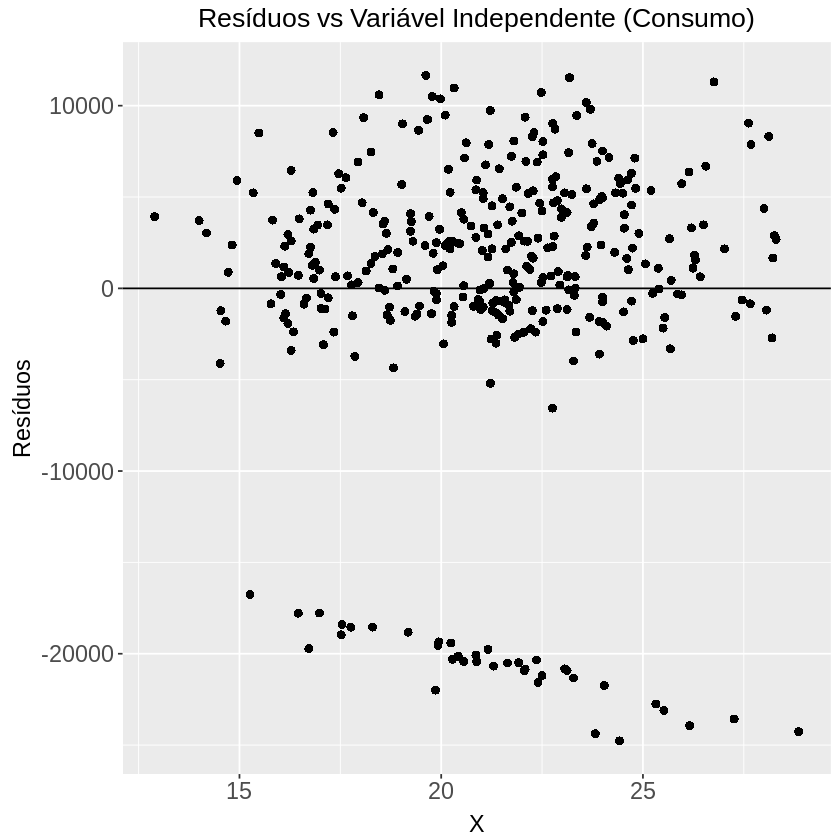

In [145]:
ggplot(data = dados_consumo_final, aes(x = X, y = Residuos)) +
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 2.5, stroke = 0) +
    xlab("X") +
    ylab("Resíduos") +
    ggtitle('Resíduos vs Variável Independente (temperatura)') +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        axis.title.y = element_text(size = 14, vjust = 0.2),
        axis.title.x = element_text(size = 14, vjust = -0.2),
        axis.text.y = element_text(size = 14),
        axis.text.x = element_text(size = 14)
    )


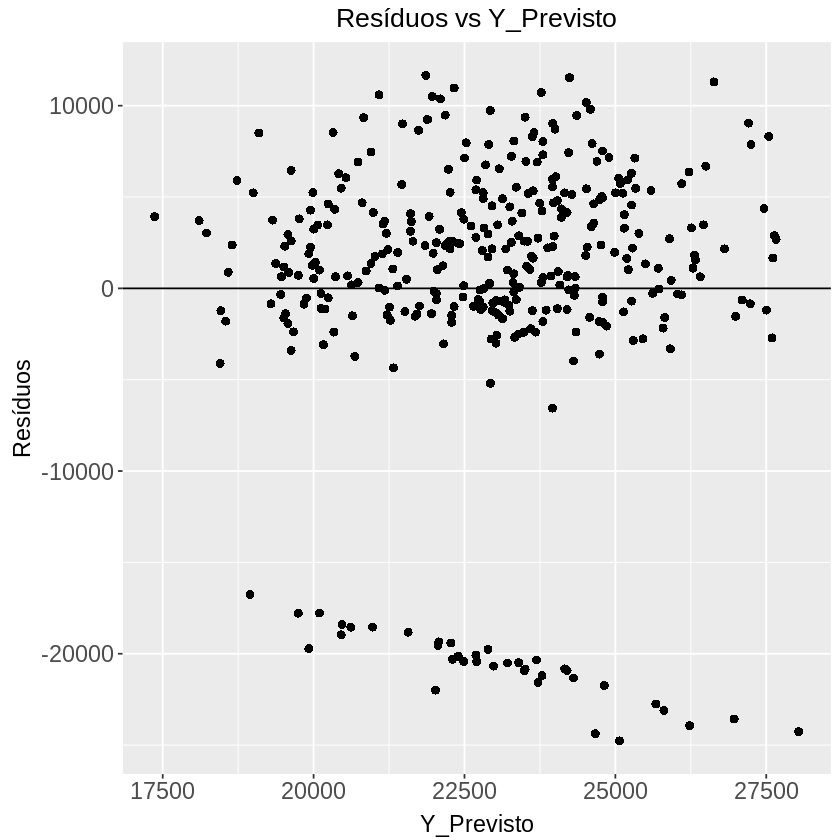

In [146]:
ggplot(data = dados_consumo_final, aes(x = Y_previsto, y = Residuos)) +
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 2.5, stroke = 0) +
    xlab("Y_Previsto") +
    ylab("Resíduos") +
    ggtitle('Resíduos vs Y_Previsto') +
    theme(
        plot.title = element_text(size = 16, hjust = 0.5),
        axis.title.y = element_text(size = 14, vjust = 0.2),
        axis.title.x = element_text(size = 14, vjust = -0.2),
        axis.text.y = element_text(size = 14),
        axis.text.x = element_text(size = 14)
    )

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$


In [147]:
anova <- anova(resultado_regressao)
anova

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,1645055808,1645055808,26.55785,4.208701e-07
Residuals,363,22485079150,61942367,NA,NA


In [148]:
SQE <- sum(apply(dados_consumo_final, 1, function(x) x['Residuos']^2))
SQE

[1] 22485079150

In [150]:
# Soma dos quadrados Totais.
SQT <- sum(apply(dados_consumo_final, 1, function(x) (x['Y']-mean(dados_consumo_final$Y))^2))
SQT

[1] 24130134959

In [151]:
# soma dos quadrados da regressão.
SQR <- sum(apply(dados_consumo_final, 1, function(x) (x['Y_previsto']-mean(dados_consumo_final$Y))^2))
SQR

[1] 1645055808

In [152]:
R2 <- SQR/SQT
R2

[1] 0.06817433

In [153]:
resumo <- summary (resultado_regressao)
resumo


Call:
lm(formula = Y ~ X, data = dados_consumo_final)

Residuals:
   Min     1Q Median     3Q    Max 
-24766  -1216   1365   4518  11657 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8744.3     2784.1   3.141  0.00182 ** 
X              668.5      129.7   5.153 4.21e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7870 on 363 degrees of freedom
Multiple R-squared:  0.06817,	Adjusted R-squared:  0.06561 
F-statistic: 26.56 on 1 and 363 DF,  p-value: 4.209e-07


In [154]:
resumo$r.squared # vamos vereificar se conseguimos o mesmo R2

[1] 0.06817433